## Network Anomaly Detection

#### Problem statement: 
    Network security has become an essential concern because of rapid Internet expansion along with interconnected systems because hackers now use sophisticated threats against network vulnerabilities including data breaches and DDoS attacks. This study employs machine learning algorithms to analyze network traffic for irregular patterns consisting of IP addresses along with port numbers as well as data transfer rates and protocols which suggest security risks. Real-time pattern analysis through the system delivers offensive action points which help IT administrators alongside security professionals take preventive defensive measures.
#### Problem solution: 
    Network anomalies detection benefits from a machine learning-based approach using the Isolation Forest algorithm because it detects outliers in data of various dimensions. The model receives network traffic features through preprocessing which includes standardization and label encoding before its training on IP addresses and ports and data transfer rates and protocol types. The system uses training data patterns to identify abnormal traffic behaviors in real time which triggers prompt alerts to support proactive cybersecurity protocols.  professionals take preventive defensive measures.

## Libraries Uploading 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler

pandas: supplies data manipulation as well as analysis functions which excel at processing table (DataFrame) datasets.

numpy: Provides support for large, multi-dimensional arrays and numerical operations.

matplotlib: provides static interactive and animated visualization capabilities to Python through matplotlib.pyplot library.

seaborn: The statistical graphic interface seaborn overbuilds matplotlib to enable users to make both appealing and knowledge-rich visual representations.

The sklearn.ensemble.IsolationForest: constitutes a machine learning algorithm dedicated to detecting anomalies and outliers in data.

sklearn.preprocessing.LabelEncoder: this tool  converts category data labels to numbers suitable for machine learning applications.

The sklearn.preprocessing.StandardScaler: this tool standardizes features through a process that removes mean values and adjusts it to follow unit variance since it enhances various model performances.

## Datasets uploading

In [2]:
# Load datasets
train_data = "training.csv"
test_data = "testing.csv"
features_data = "features.csv"

# Load datasets with encoding handling
df_train = pd.read_csv(train_data, encoding='utf-8-sig')

df_test = pd.read_csv(test_data, encoding="ISO-8859-1")
df_features = pd.read_csv(features_data, encoding="ISO-8859-1")

## Datasets Description

The project makes use of a dataset composed of network traffic records for anomaly-based cybersecurity system analysis. A single entry shows an exact moment when two devices connected to the network with complete details about their attributes and behavioral characteristics. The key features include:
•  Destination Port: Port number on the receiving end of the connection.

•  Protocol: The protocol used (e.g., TCP, UDP, ICMP).

•  Flow Duration: Total duration of the connection.

•  Total Fwd Packets / Total Backward Packets: Number of packets sent forward and backward in the session.

•  Total Length of Fwd / Bwd Packets: The cumulative size of all packets sent forward or backward.

•  Flow Bytes/s / Flow Packets/s: Byte and packet rates within a network flow.

•  Fwd Header Length: Size of the forward header.

•  Flag Counts: Binary indicators or counts of TCP flag statuses like PSH, ACK, URG, etc.

•  Average Packet Size / Packet Length Std: Statistical measures of the packet sizes within a flow.

•  Label: Indicates whether the flow is normal or an anomaly.


In [3]:
# training dataset
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
#testing dataset
df_test.head()

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ï»¿id              175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [7]:
# features dataset
df_features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [8]:
df_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

#### Using  These for EDA & Clustering:
1. UNSW_NB15_training-set.csv → For exploratory data analysis (EDA) & model training.
2. UNSW_NB15_testing-set.csv → To evaluate the clustering model later.
3. UNSW-NB15_features.csv → To understand the meaning of each column (no need to process this file).

## Data Cleaning

I conducted a manipulative data cleaning process that introduced artificial missing values for practice in handling this issue. Five percent of random NaN values appeared in the numeric columns 'sbytes', 'dbytes' and 'sttl' using fixed random seed parameters for consistency. I verified the level of missing values before replacing them by utilizing the mean value from each column. Before closing this process I ensured that no more missing values existed in the dataset following the imputation procedure.

Key points:

Three numeric columns which suited missing value operations served as my selection.

The code introduced approximately 5% random missing entries through a repeatable procedure.

Mean imputation method enabled completion of gaps in missing values.

The analyst checked that the system managed missing data correctly.

### Handling Missing Values

#### Simulating Missing Values

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns where its ok to introduce missing values
cols_with_nan = ['sbytes', 'dbytes', 'sttl']  # Change columns as per your dataset

# Randomly introducing ~5% missing values into selected columns
np.random.seed(42)  # Reproducibility
for col in cols_with_nan:
    df_train.loc[df_train.sample(frac=0.05).index, col] = np.nan

# Check missing values count
print("Missing values introduced: \n", df_train[cols_with_nan].isnull().sum())


Missing values introduced: 
 sbytes    4117
dbytes    4117
sttl      4117
dtype: int64


#### Identifying missing values

In [10]:
# Checking for missing values
df_train.isnull().sum() * 100/len(df_train)


id                   0.000000
dur                  0.000000
proto                0.000000
service              0.000000
state                0.000000
spkts                0.000000
dpkts                0.000000
sbytes               5.000486
dbytes               5.000486
rate                 0.000000
sttl                 5.000486
dttl                 0.000000
sload                0.000000
dload                0.000000
sloss                0.000000
dloss                0.000000
sinpkt               0.000000
dinpkt               0.000000
sjit                 0.000000
djit                 0.000000
swin                 0.000000
stcpb                0.000000
dtcpb                0.000000
dwin                 0.000000
tcprtt               0.000000
synack               0.000000
ackdat               0.000000
smean                0.000000
dmean                0.000000
trans_depth          0.000000
response_body_len    0.000000
ct_srv_src           0.000000
ct_state_ttl         0.000000
ct_dst_ltm

#### Mean Imputation

In [11]:
for col in cols_with_nan:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

In [12]:
print("Missing values after imputation:\n", df_train[cols_with_nan].isnull().sum())

Missing values after imputation:
 sbytes    0
dbytes    0
sttl      0
dtype: int64


#### After handling missing values

In [13]:
# Checking for missing values after cleaning
df_train.isnull().sum() * 100/len(df_train)


id                   0.0
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0


### Handling Outliers

A procedure was applied to deal with outliers in my numeric dataset columns. Before proceeding I developed boxplots of numeric features ('sbytes' 'dbytes' 'sttl' 'rate' 'sload' 'dload' 'tcprtt' 'synack' and 'ackdat') so I could spot outliers effectively. I applied the IQR (interquartile range) method for outlier treatment by placing nearest acceptable values in place of points outside the boundaries. I checked the updated boxplots to validate the success of extreme outlier treatment following the capping process.

Key points:

The evaluation of numerical features relied on boxplots to detect outlier data points.

The analysis employed IQR method to manage the extremity of the data points.

The outlier values remained in place after applying replacement treatment instead of discarded data points.

Verification of alterations occurred by observing new boxplots.

#### Identifying Outliers using Box plot

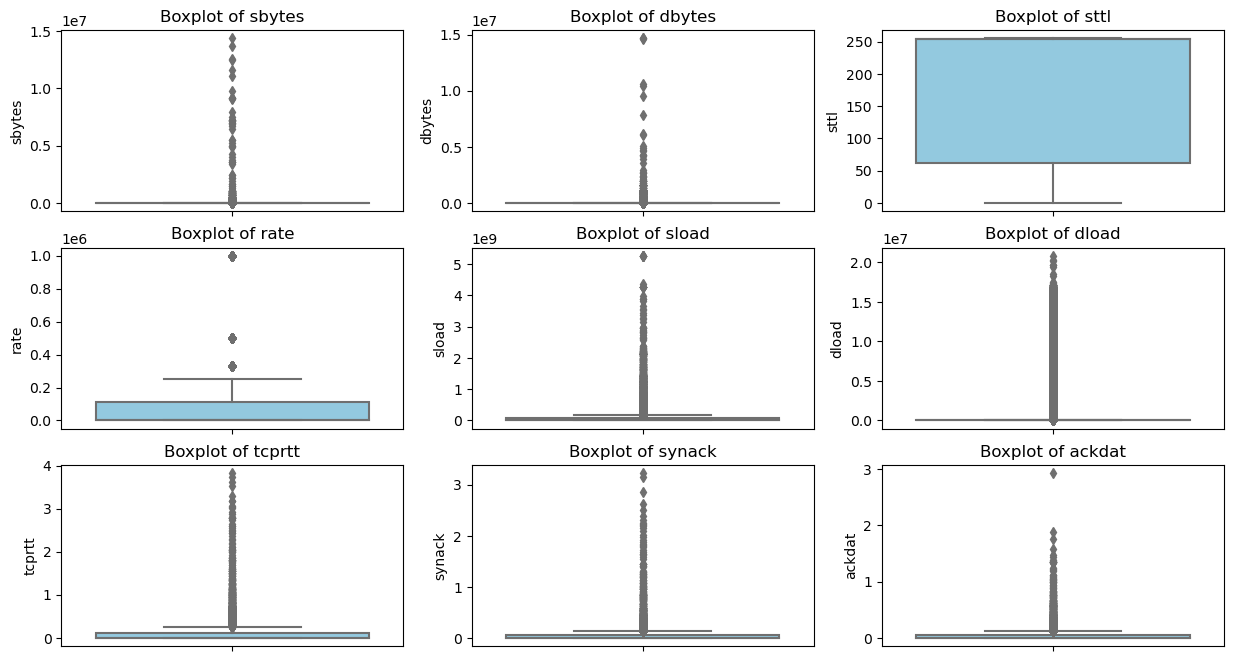

In [14]:
# List of numeric columns to visualize
numeric_cols = ['sbytes', 'dbytes', 'sttl', 'rate', 'sload', 'dload', 'tcprtt', 'synack', 'ackdat']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_train, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.show()


#### Handling Outliers

In [15]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

# Apply capping to all numeric columns
for col in numeric_cols:
    cap_outliers(df_train, col)

print("Outliers have been capped successfully.")


Outliers have been capped successfully.


Why Did I Use Capping / Winsorization?

Definition:
Capping or Winsorization means replacing extreme outlier values (above or below the threshold) with the threshold value itself instead of completely removing them.

#### After Handling Outliers Visualization using Box plot

After Handling Outliers:


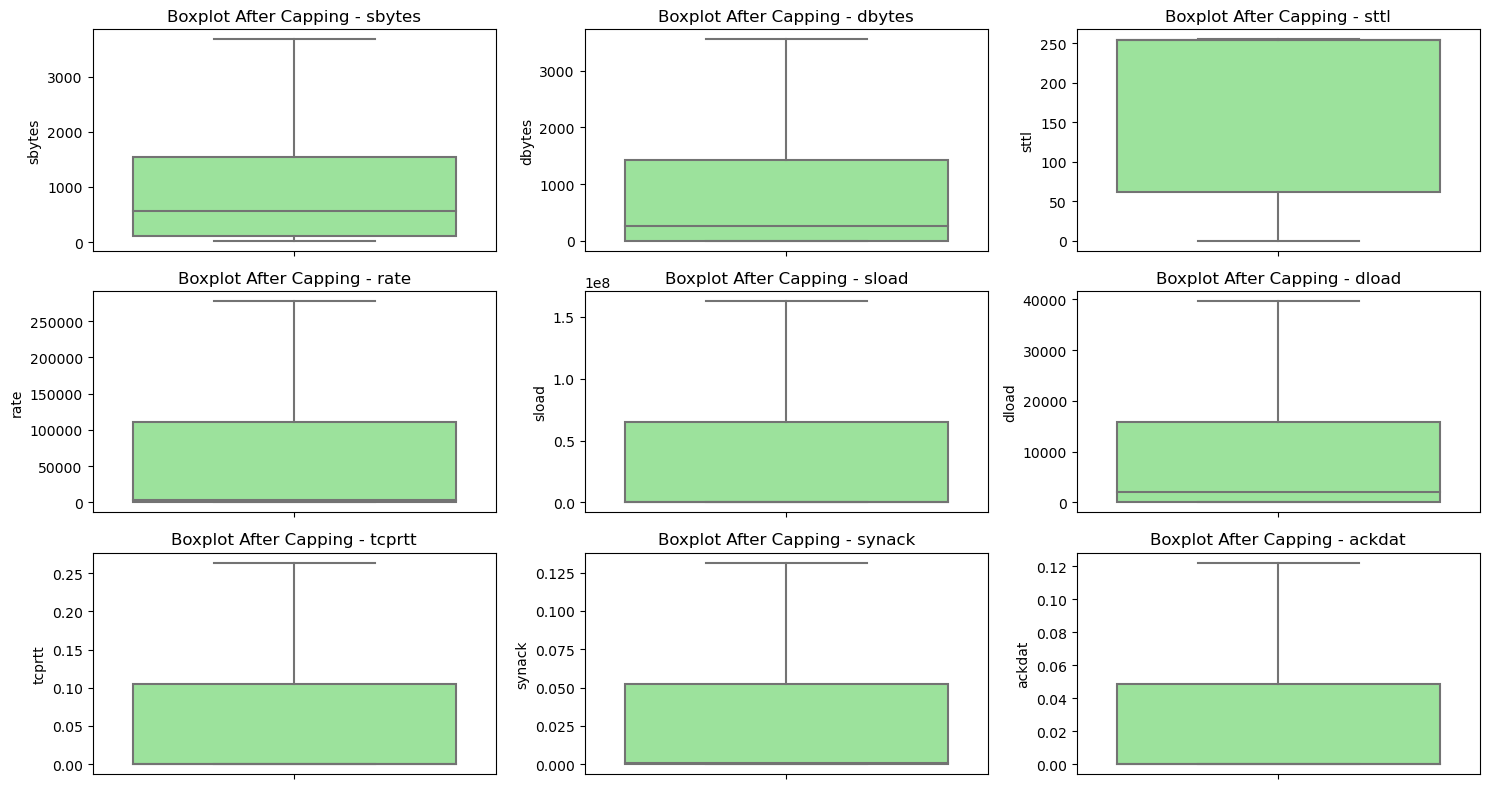

In [16]:
print("After Handling Outliers:")
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_train, y=col, color='lightgreen')
    plt.title(f'Boxplot After Capping - {col}')
plt.tight_layout()
plt.show()


### Data Normalization and Standardization

I executed feature scaling to standardize all numeric features during this step. Only selectable numeric variables were retained while skipping non-numeric fields including 'proto', 'service', 'state' along with removal of the 'label' column because it functioned as the target. StandardScaler normalized the features by transforming their values into a mean of zero with standard deviation of one. The numeric features which appeared in both training and testing sets received scaling treatment whereas the rest of fields remained unchanged to maintain dataset consistency. Such normalization enables the performance improvement of models because it prevents features from receiving unequal weight.

Key points:

The selected process included numeric columns solely while removing both the target along with ID columns.

StandardScaler was used for transforming the feature values into a standardized format.

The standardization process was applied identically to both training and testing data samples.

The data preparation techniques were implemented to achieve superior model results.

#### Selecting Only Numeric Columns for Scaling

In [17]:
# Drop non-numeric columns (like 'proto', 'service', 'state', 'attack_cat', etc.)
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

# Optional: Drop 'label' if you don't want to scale the target
numeric_cols = numeric_cols.drop('label')

# Preview numeric columns
print(numeric_cols)


Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


#### Standardizing

In [18]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns from df_train
numeric_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numeric_cols_train:
    numeric_cols_train.remove('id')

# Get numeric columns from df_test
numeric_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Only scale columns that exist in both datasets
common_numeric_cols = list(set(numeric_cols_train).intersection(numeric_cols_test))

# Initialize and apply the scaler
scaler = StandardScaler()

df_train_scaled = df_train.copy()
df_train_scaled[common_numeric_cols] = scaler.fit_transform(df_train[common_numeric_cols])

df_test_scaled = df_test.copy()
df_test_scaled[common_numeric_cols] = scaler.transform(df_test[common_numeric_cols])

df_train_scaled.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,-0.213727,udp,-,INT,-0.124455,-0.151816,-0.498106,-0.692942,0.254269,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,Normal,-1.106883
1,2,-0.213728,udp,-,INT,-0.124455,-0.151816,0.493081,-0.692942,0.622819,...,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607,Normal,-1.106883
2,3,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.050271,1.974348,1.433630,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607,Normal,-1.106883
3,4,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.181803,-0.692942,1.073270,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,Normal,-1.106883
4,5,-0.213728,udp,-,INT,-0.124455,-0.151816,0.778067,-0.692942,0.352549,...,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607,Normal,-1.106883


### Feature Selection

I analyzed the correlation matrix to detect features which showed a value above 0.9 in their correlation because multicollinearity occurred when this threshold was met. The training included dropping highly correlated features because redundancy would occur. Additional features were eliminated through manual selection and correlation testing because of domain understanding.

Key points:

The unnecessary columns received removal to achieve dataset cleanliness.

The process of transforming categorical variables into numbers through label encoding occurred during this step.

Removed features with high correlation (> 0.9).

Additional features selection occurred through manual evaluation leading to the removal of selected attributes.

In [19]:
# Dropping irrelevant columns
cols_to_drop = ['ï»¿id', 'attack_cat']  
df_train_selected = df_train_scaled.drop(columns=cols_to_drop, errors='ignore')

# Label encoding 
cat_cols = ['proto', 'service', 'state']
le = LabelEncoder()

for col in cat_cols:
    df_train_selected[col] = le.fit_transform(df_train[col])

corr_matrix = df_train_selected.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly Correlated Features to Drop:", to_drop_corr)

df_train_selected.drop(columns=to_drop_corr, inplace=True)


high_corr_features = [
    'sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'synack',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'
]

df_train_selected = df_train_scaled.drop(columns=high_corr_features)

Highly Correlated Features to Drop: ['sload', 'sloss', 'dloss', 'dwin', 'synack', 'ackdat', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


### Feature Engineering 

At this development stage new features were designed to discover sophisticated data patterns for model analysis purposes. To determine data transfer balances between source and destination bytes I introduced the new 'byte_ratio' feature. Development of the 'flow_complexity' feature entailed a multiplication between measured duration and Time to Live values for connection complexity measurement. A log transformation solved the distribution problems found in the features 'sload', 'dload' and 'rate'. The 'is_long_connection' binary variable acted as a new feature to analyze different traffic patterns by identifying prolonged internet connections.

Key points:

A byte_ratio measure served as a traffic proportion identification tool.

The system generated 'flow_complexity' for measuring the strength of network traffic connections.

The skewed numeric values received log transformation as part of the analysis.

The secondary attribute 'is_long_connection' works as a binary feature by analyzing connection time span.

In [20]:
import numpy as np
import pandas as pd

# Copy the original dataset
df_engineered = df_train_selected.copy()

# 1. Create 'byte_ratio'
if 'sbytes' in df_engineered.columns and 'dbytes' in df_engineered.columns:
    df_engineered['byte_ratio'] = (df_engineered['sbytes'] + 1) / (df_engineered['dbytes'] + 1)

# 2. Create 'flow_complexity'
if 'dur' in df_engineered.columns and 'sttl' in df_engineered.columns:
    df_engineered['flow_complexity'] = df_engineered['dur'] * df_engineered['sttl']

# 3. Log-transform for skewed features
for col in ['sload', 'dload', 'rate']:
    if col in df_engineered.columns:
        df_engineered[f'log_{col}'] = np.log1p(df_engineered[col])

# 4. Binary feature: long vs short duration
if 'dur' in df_engineered.columns:
    df_engineered['is_long_connection'] = (df_engineered['dur'] > df_engineered['dur'].mean()).astype(int)

# View new features
print("New engineered features:", [col for col in df_engineered.columns if col not in df_train_selected.columns])


New engineered features: ['flow_complexity', 'log_sload', 'log_dload', 'log_rate', 'is_long_connection']


#### Viewing the new features added

In [21]:
df_engineered.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'ackdat', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'attack_cat', 'label',
       'flow_complexity', 'log_sload', 'log_dload', 'log_rate',
       'is_long_connection'],
      dtype='object')

## EDA

### Connection Count by Protocol

Analysis: The network connections rely heavily on TCP because it constitutes the majority of protocols at approximately 40,000 instances while UDP follows with around 29,000 instances. TCP stands as the leading network protocol because it has more than 40,000 connections whereas UDP follows with approximately 29,000 connections. TCP together with UDP controls the bulk of system traffic based on the frequency analysis of the protocols UNAS, ARP, and OSPF. The data reflects typical internet operations because traditional communications between networks depend primarily on these two protocols.

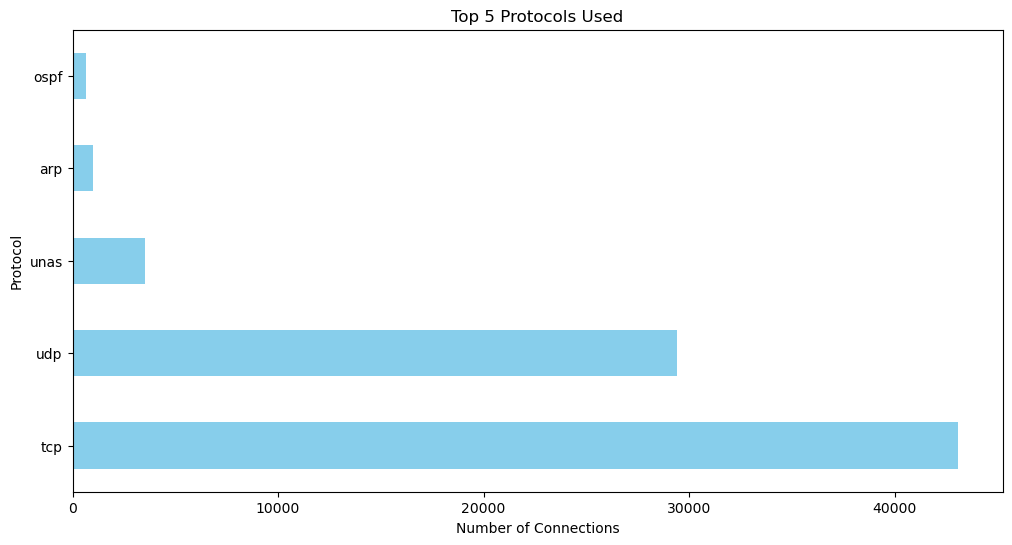

In [22]:
plt.figure(figsize=(12,6))
df_train_selected['proto'].value_counts().head(5).plot(kind='barh', color='skyblue')
plt.title("Top 5 Protocols Used")
plt.xlabel("Number of Connections")
plt.ylabel("Protocol")
plt.show()


### Distribution of Packet Rate

Analysis: The Distribution of Packet Rate (rate) appears after implementing log transformation according to the plot. Most data points cluster towards the lower range because the distribution demonstrates significant rightward skewness. Most of the network connections maintain low packet rates with only select cases recording higher rates. Regular network traffic data shows low-rate communications exist much more frequently than high-rate connections possibly due to short bursts or malicious activity.

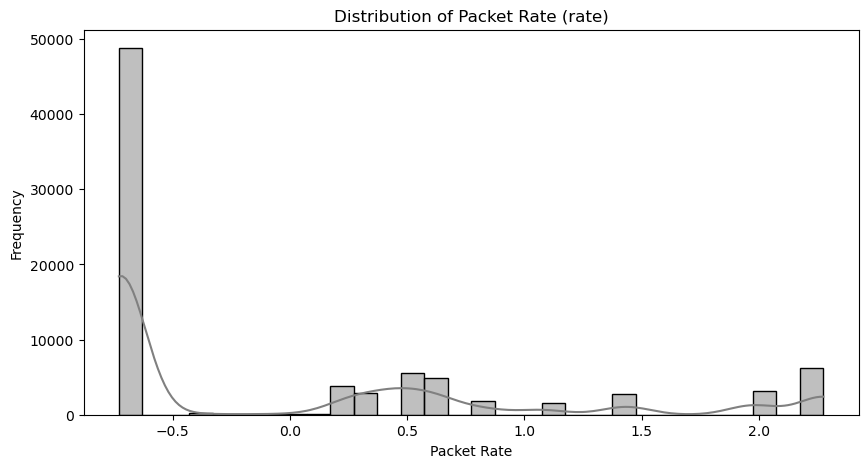

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df_train_selected['rate'], bins=30, kde=True, color='gray')
plt.title("Distribution of Packet Rate (rate)")
plt.xlabel("Packet Rate")
plt.ylabel("Frequency")
plt.show()


### Attack Category Frequency

Analysis: The shown graphic presents Attack Categories distribution data. The dataset shows extensive imbalance through its distribution where Normal traffic cases dominate followed by Generic and Exploits categories. Training challenges exist during model development because the attack types Worms, Shellcode, and Backdoor represent only a small number of instances in the dataset.

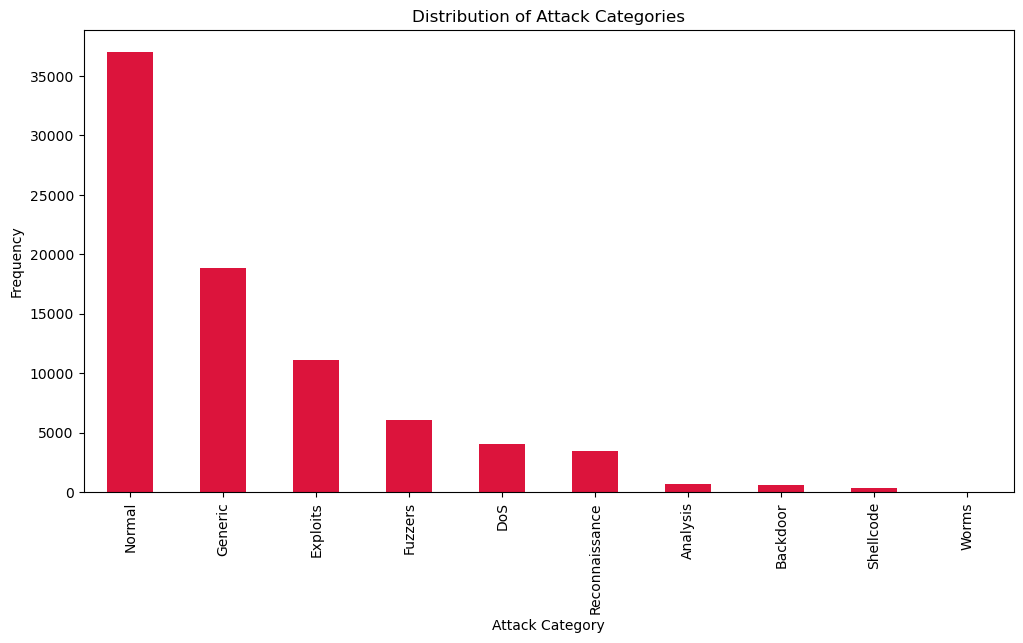

In [24]:
plt.figure(figsize=(12,6))
df_train_selected['attack_cat'].value_counts().plot(kind='bar', color='crimson')
plt.title("Distribution of Attack Categories")
plt.xlabel("Attack Category")
plt.ylabel("Frequency")
plt.show()


### Analysis of Average Packet Rate per Attack Category


Analysis: The average packet rate indicators for different attack categories appear in the statistical graph. The active nature of generic and analysis as well as backdoor attacks produces elevated average packet rates. Analysis and Generic attacks as well as Backdoors produce elevated (positive) average packet rates although Worms and Normal traffic lead to decreased (negative) rates. The average packet rates for the 'Reconnaissance' attacks as well as the 'DOS' and 'Shellcode' attacks remain in the low to moderate levels. Through this recognized pattern analysts can recognize standard network activities from malicious ones during packet rate measurement operations.

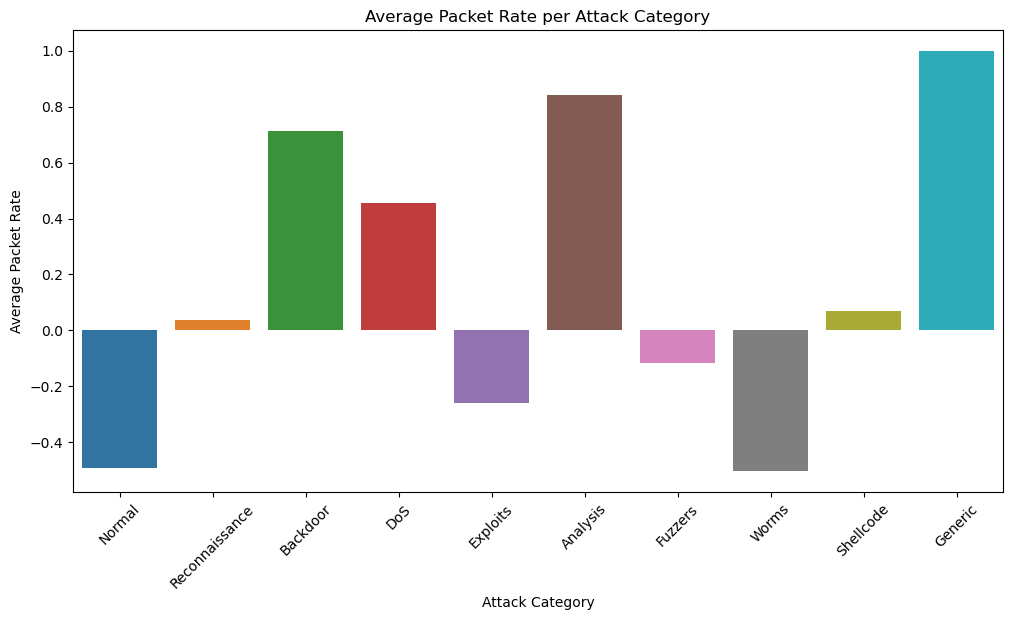

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_train_selected, x='attack_cat', y='rate', errorbar=None)

plt.xticks(rotation=45)
plt.title("Average Packet Rate per Attack Category")
plt.xlabel("Attack Category")
plt.ylabel("Average Packet Rate")
plt.show()


### Flow Duration Distribution Across Different Attack Categories

Analysis: An analysis of flow duration frequency exists in the box plot across different network attack types. Network traffic 'Normal' maintains a broad distribution of flow durations because it includes extended traffic sessions. The 'Index' reporting supports the identification of multiple outliers across 'Fuzzers' and 'Analysis' entry attack categories together with extended median flow durations for these categories. The network attack techniques 'Backdoor' 'DoS' and 'Shellcode' result in highly concentrated and brief flow duration patterns in comparison to other categories. Attack temporal patterns show dissimilarities through this frequency distribution since they present unique patterns that prove vital for anomaly detection and network defense strategies.

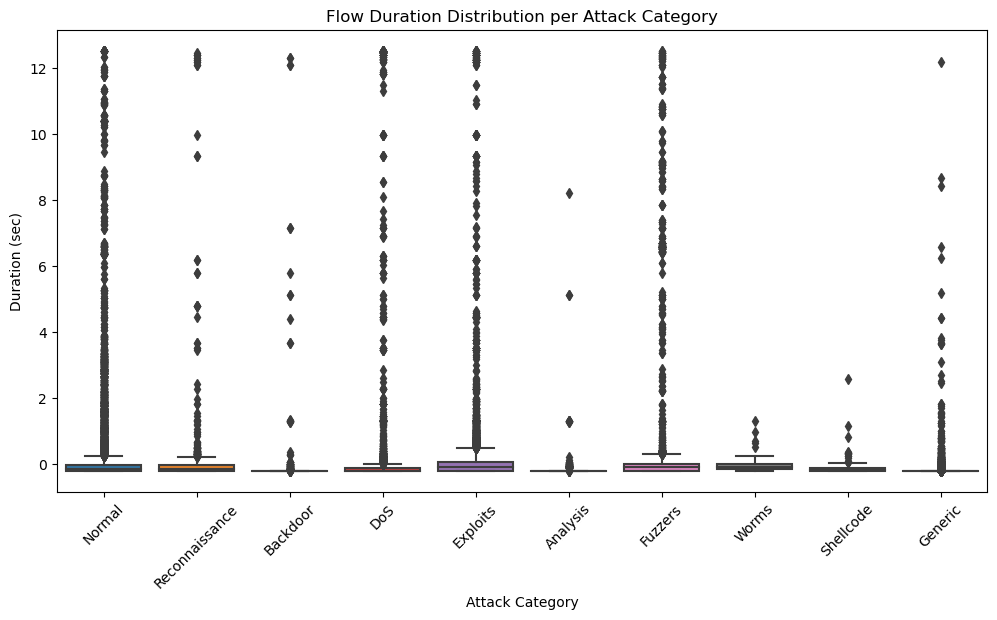

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train_selected, x='attack_cat', y='dur')
plt.xticks(rotation=45)
plt.title("Flow Duration Distribution per Attack Category")
plt.xlabel("Attack Category")
plt.ylabel("Duration (sec)")
plt.show()


### Correlation Between Network Traffic Features

Analysis: A heatmap shows all numerical input connections in the dataset. A strong positive correlation appears in red although strong negative correlations display in blue colors. The features ct_dst_sport_ltm, ct_dst_src_ltm and ct_src_dport_ltm demonstrate significant relationships among them which represents redundancy suitable for feature selection process. The correlation values of rate and sload show both weak and negative associations when compared to other features. Analyzing these data relationships proves essential because it allows both better model optimization and the reduction of feature redundancy.

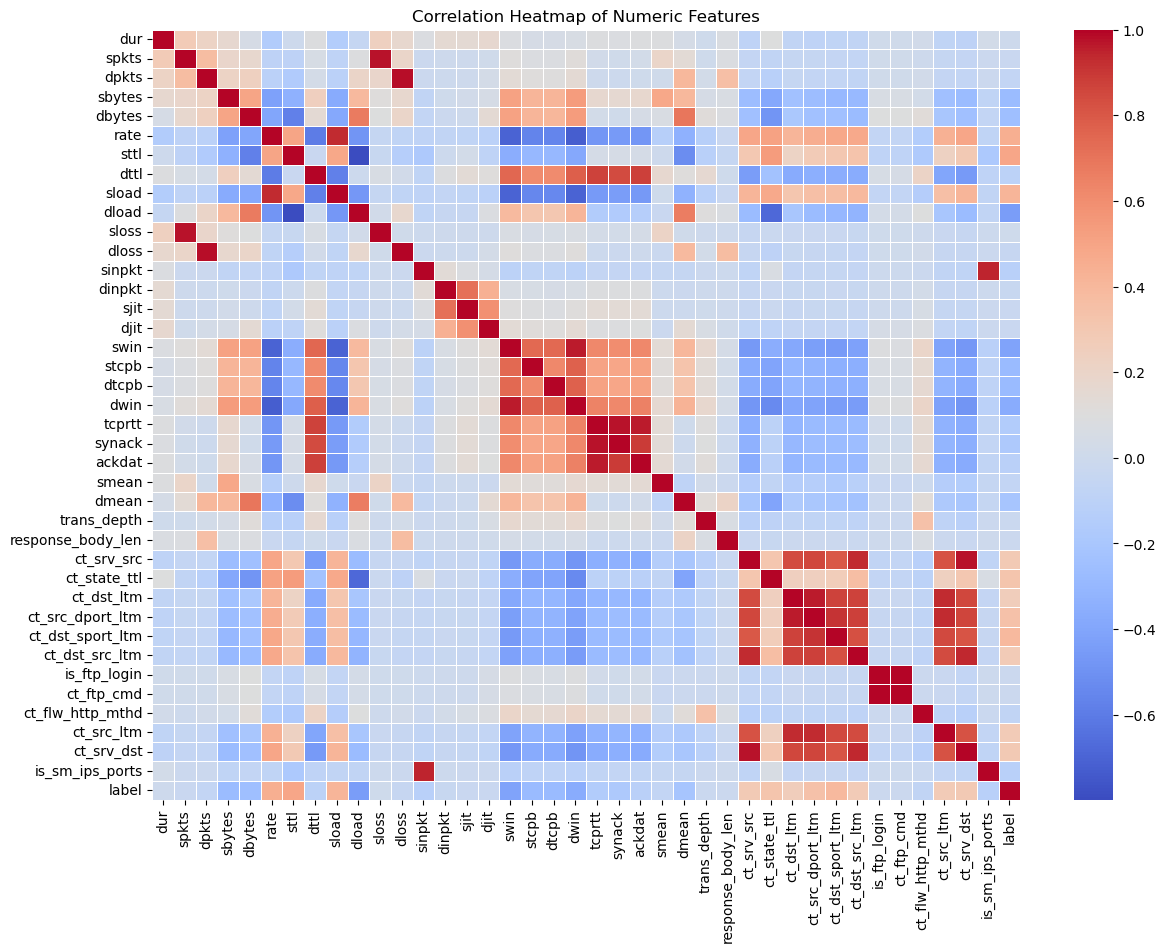

In [27]:
plt.figure(figsize=(14, 10))
numeric_df = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [28]:
df_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

### Data Preprocessing: Label Encoding and Feature Scaling for Model Creation and Evaluation 

The initial phase in my data preparation involved eliminating the target columns (label and attack_cat) then working on only input features. A review of non-numeric features took place before implementing Label Encoding to create numerical representations from these elements. I standardized all feature values through StandardScaler to normalize them at equal scale to eliminate scale-based biases in learning.

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Drop target columns (if present)
X = df_train.drop(['label', 'attack_cat'], axis=1, errors='ignore')

# Step 2: Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include='object').columns

# Step 3: Label encode all non-numeric columns
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Anomaly detection of network flow data involved the execution of Isolation Forest algorithm in this stage. I used 100 estimators to deploy the model while targeting 5% expected contamination level. Before determining data points as normal or anomalous the scaling of features was used to fit a model through prediction. A binary format transformed the prediction results into which 1 represented anomalies and 0 indicated normal patterns so abnormal patterns could be identified.

In [30]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)
y_pred_iso = iso_forest.predict(X_scaled)

# Convert to 0 (normal), 1 (anomaly)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]


## Model Creating and Evaluation

Noise reduction operations on data happened after encoding categorical variables into numbers then followed the division of data into test and train sets before scale normalization and target value conversion for training.

The features with categorical values received their transformation using LabelEncoder.

X representation required the removal of columns 'id' 'attack_cat' and 'label' followed by using 'label' as the variable y.

The train_test_split function divided the data into separate training and testing parts with 80 percent assigned to training.

The features received standardization from StandardScaler although the target variable received no changes.

The project used 0.5 as the threshold value to convert the target outcomes into binary format.

In [31]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_engineered.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [32]:
# Re-define X and y
X = df_encoded.drop(columns=['id', 'attack_cat', 'label'])
y = df_encoded['label']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features, NOT target
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# If your target is a probability or score between 0 and 1, convert it to binary
y_train = (y_train > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)


### Model Training 

The subsequent operation involved training various machine learning algorithms against the dataset to measure their accuracy levels.

The development stage included defining a dictionary which contained six models namely Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Naive Bayes.

The process included multiple runs through each model which received training from the training data followed by testing from those same testing data scenarios.

The accuracy_score durability metric evaluated models while printing their result outcomes.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")



Training Logistic Regression...
Accuracy for Logistic Regression: 0.8587

Training Random Forest...
Accuracy for Random Forest: 0.9461

Training SVM...
Accuracy for SVM: 0.9074

Training KNN...
Accuracy for KNN: 0.9115

Training Naive Bayes...
Accuracy for Naive Bayes: 0.7566


### Hyperparameter Tuning 

RandomizedSearchCV applied hyperparameter tuning to the Random Forest model in order to identify superior parameter combinations for enhancing accuracy outcomes.

The system turned off user notifications to deliver output without confusion.

The parameter grid contained multiple options for n_estimators while max_depth and min_samples_split formed additional options.

RandomizedSearchCV performed a random search among multiple parameter sets with 3-fold cross-validation methods.

The search object applied training to its data while printing selected parameters.

In [42]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=5,  # Still fine, will run 2
    cv=3,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}


### Comparision with other models 

The evaluation of visual performance by a confusion matrix was performed on the best Random Forest model after its additional training process.

The best-suited Random Forest model was designed through use of identified optimal parameters.

The model received training through its exposure to training data followed by its analysis of testing data.

A confusion matrix heatmap appeared through ConfusionMatrixDisplay for revealing actual versus forecasted results.

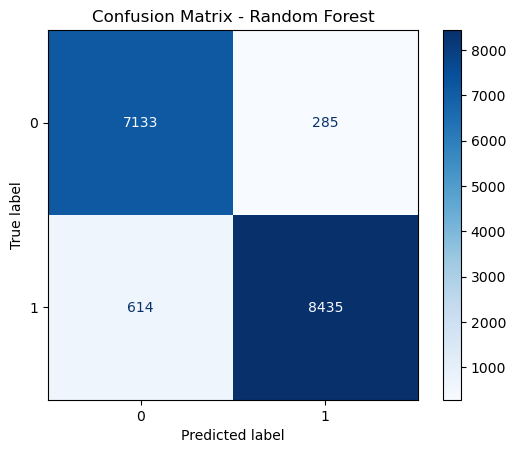

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming Random Forest was the best model
best_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)

# Display heatmap
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Error Analysis 

A detailed classification report was created for the best model which was Random Forest along with misclassified sample identification at this stage.

The process selected and printed a collection of misclassified samples which showed discrepancy between their predicted labels and actual labels.

The tool classification_report presented the metrics precision, recall, F1-score and support for each class.

The code ensures the smooth execution of division operations that can occur when zero values are involved through the zero_division=0 assignment.

In [39]:
# Only if you have labels that make sense to show
misclassified = X_test[(y_test != y_best_pred)]
print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 899


In [41]:
from sklearn.metrics import classification_report

print("Classification Report for Best Model (Random Forest):")
print(classification_report(y_test, y_best_pred, zero_division=0))


Classification Report for Best Model (Random Forest):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7418
           1       0.97      0.93      0.95      9049

    accuracy                           0.95     16467
   macro avg       0.94      0.95      0.95     16467
weighted avg       0.95      0.95      0.95     16467

